In [1]:
import pandas as pd
mvc = pd.read_csv("nypd_mvc_2018.csv")
null_counts = mvc.isnull().sum()

In [3]:
killed_cols = [col for col in mvc.columns if 'killed' in col]
killed = mvc[killed_cols].copy()

In [10]:
killed_manual_sum = killed.iloc[:,:3].sum(axis=1)

In [11]:
killed_mask = killed_manual_sum != killed['total_killed']
killed_non_eq = killed[killed_mask]

In [12]:
import numpy as np

# fix the killed values
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'].isnull(), killed_manual_sum)
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'] != killed_manual_sum, np.nan)

# Create an injured dataframe and manually sum values
injured = mvc[[col for col in mvc.columns if 'injured' in col]].copy()
injured_manual_sum = injured.iloc[:,:3].sum(axis=1)

In [16]:
injured.head()

,pedestrians_injured,cyclist_injured,motorist_injured,total_injured
0,0,0,0,0.0
1,0,0,0,0.0
2,0,0,1,1.0
3,0,0,0,0.0
4,0,0,0,0.0


In [31]:
injured["total_injured"] = injured["total_injured"].mask(injured["total_injured"].isnull(), injured_manual_sum)
injured["total_injured"] = injured["total_injured"].mask(injured["total_injured"] != injured_manual_sum, np.nan)

In [33]:
injured["total_injured"] = mvc["total_injured"]
killed["total_killed"] = mvc["total_killed"]

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_null_correlations(df):
    # create a correlation matrix only for columns with at least
    # one missing value
    cols_with_missing_vals = df.columns[df.isnull().sum() > 0]
    missing_corr = df[cols_with_missing_vals].isnull().corr()
    
    # create a triangular mask to avoid repeated values and make
    # the plot easier to read
    missing_corr = missing_corr.iloc[1:, :-1]
    mask = np.triu(np.ones_like(missing_corr), k=1)
    
    # plot a heatmap of the values
    plt.figure(figsize=(20,14))
    ax = sns.heatmap(missing_corr, vmin=-1, vmax=1, cbar=False,
                     cmap='RdBu', mask=mask, annot=True)
    
    # format the text in the plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())

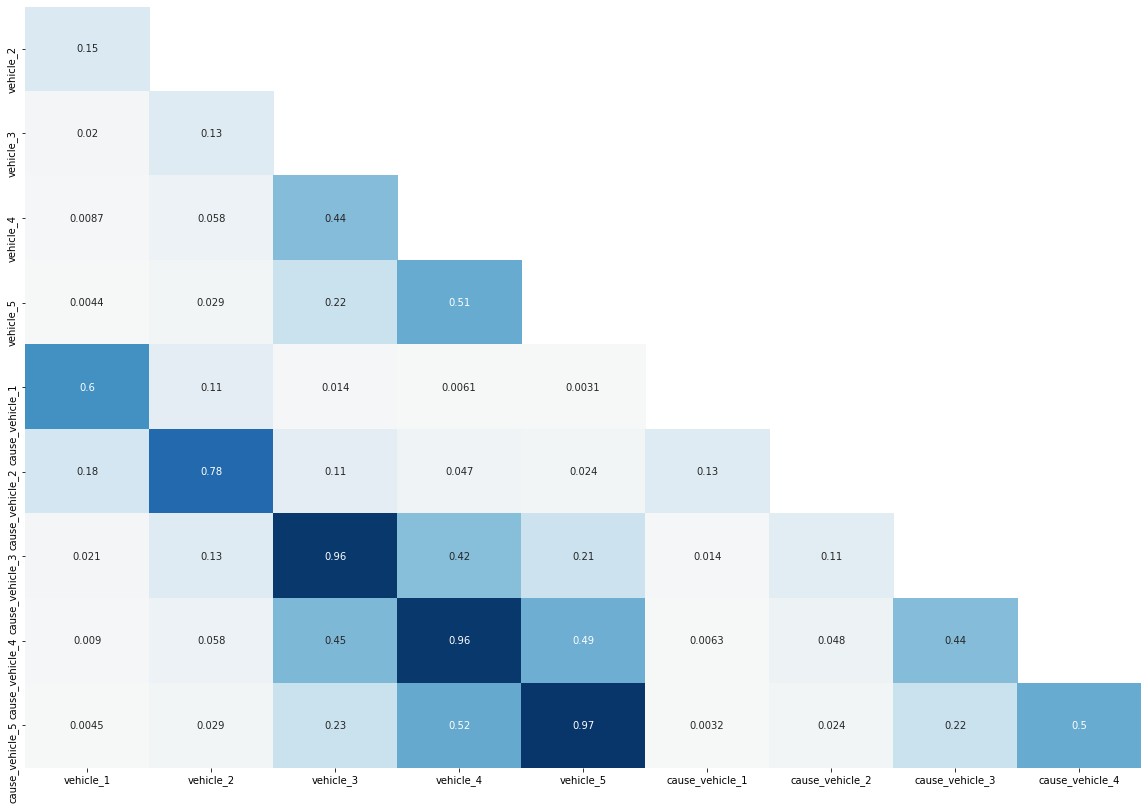

In [44]:
cols = [col for col in mvc.columns if "vehicle" in col]
plot_null_correlations(mvc[cols])

In [57]:
col_labels = ['v_number', 'vehicle_missing', 'cause_missing']

vc_null_data = []

for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    v_null = mvc[mvc[c_col].notnull()][v_col].isnull().sum()
    c_null = mvc[mvc[v_col].notnull()][c_col].isnull().sum()
    vc_null_data.append([v, v_null, c_null])
    
vc_null_df = pd.DataFrame(vc_null_data, columns=col_labels)

In [58]:
vc_null_df

,v_number,vehicle_missing,cause_missing
0,1,204,24
1,2,3793,223
2,3,242,24
3,4,50,3
4,5,10,0


In [62]:
def summarize_missing():
    v_missing_data = []

    for v in range(1,6):
        v_col = 'vehicle_{}'.format(v)
        c_col = 'cause_vehicle_{}'.format(v)

        v_missing = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
        c_missing = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()

        v_missing_data.append([v, v_missing, c_missing])

    col_labels = columns=["vehicle_number", "vehicle_missing", "cause_missing"]
    return pd.DataFrame(v_missing_data, columns=col_labels)

summary_before = summarize_missing()

for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    mvc[v_col] = mvc[v_col].mask(mvc[v_col].isnull() & mvc[c_col].notnull(), "Unspecified")
    mvc[c_col] = mvc[c_col].mask(mvc[c_col].isnull() & mvc[v_col].notnull(), "Unspecified")

summary_after = summarize_missing()
    

In [63]:
summary_after

,vehicle_number,vehicle_missing,cause_missing
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0
